# Problem : Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872
employees of a company. Among these employees, some opted for the package and some didn't. You have to help
the company in predicting whether an employee will opt for the package or not on the basis of the information given
in the data set. Also, find out the important factors on the basis of which the company will focus on particular
employees to sell their packages.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [34]:
df = pd.read_csv("Holiday_Package.csv")

### EDA

In [35]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [36]:
#Remove first column as it is just numbering
df.drop("Unnamed: 0" , axis='columns', inplace=True)

In [37]:
df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


### Check for duplicate data

In [39]:
dups = df.duplicated()
dups.sum()

0

### Geting unique counts of all Objects

In [40]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


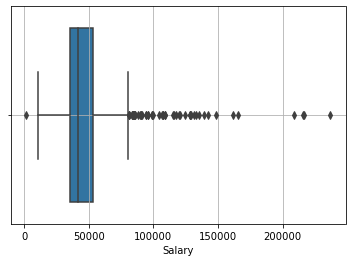

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


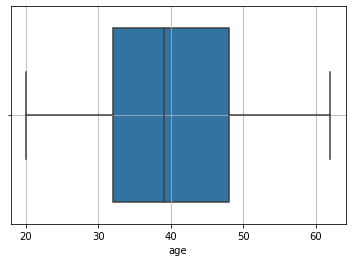

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


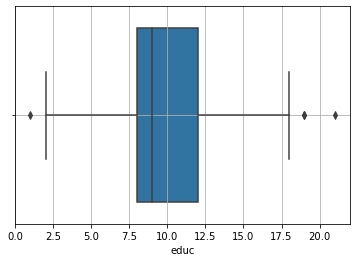

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


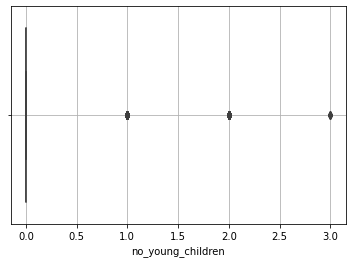

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


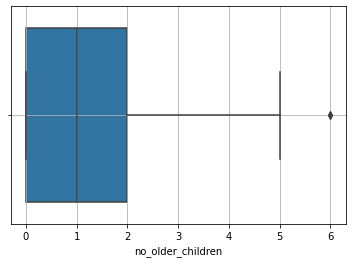

In [41]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [42]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [43]:
#We will treat the outliers for the 'Salary' variable only.
lr,ur=remove_outlier(df['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


### Checking for Correlations

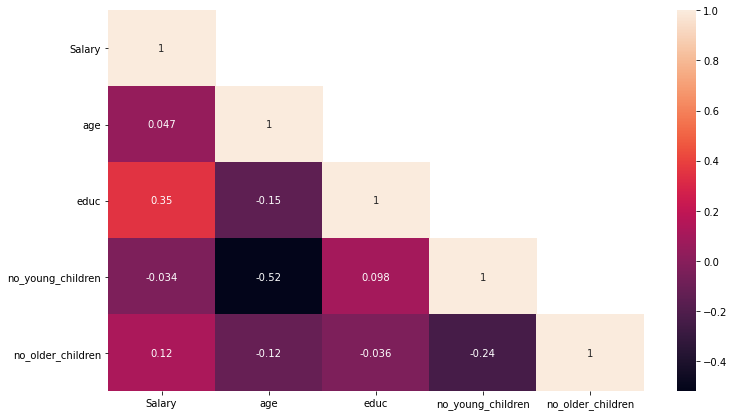

In [44]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

There is hardly any correlation between feature variables

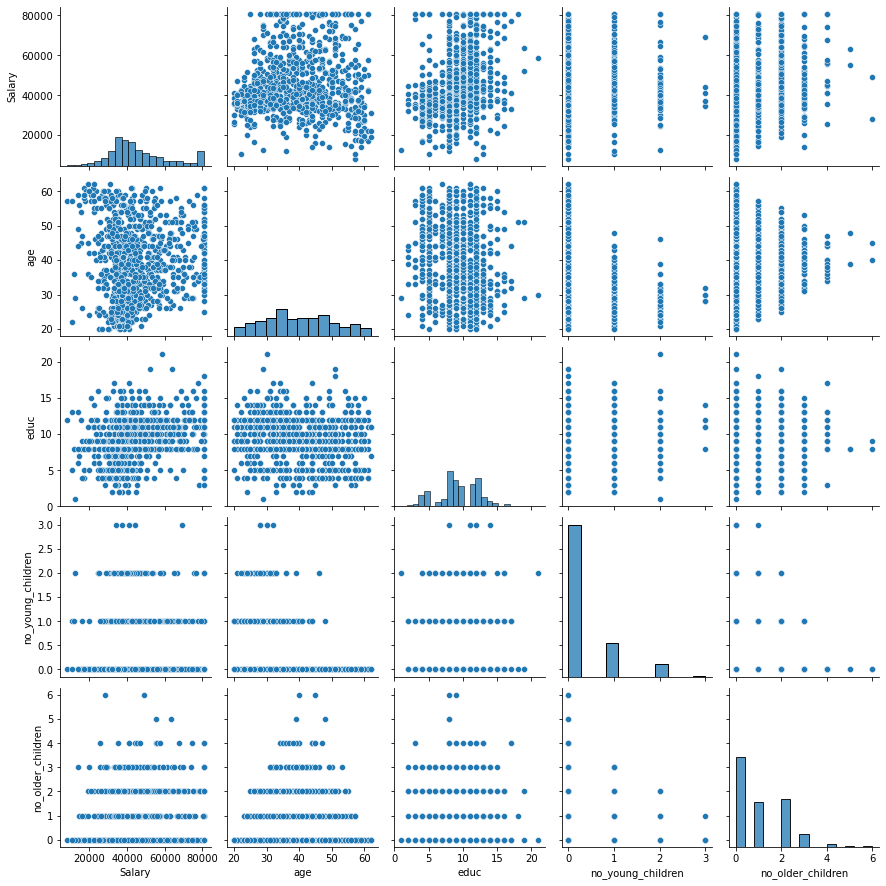

In [45]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='hist');

### Converting Categorical to Numerical

In [46]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [47]:
df['Holliday_Package'] = df['Holliday_Package'].replace({'yes': 1, 'no': 0})
df['foreign'] = df['foreign'].replace({'yes': 1, 'no': 0})
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


### Train Test Split

In [48]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [49]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Logistic Regression Model

In [50]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2, class_weight="balanced" )
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=2,
                   penalty='none', solver='newton-cg', verbose=True)

### Predicting on Training and Test dataset

In [51]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

### Model Evaluation

In [52]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6836065573770492

### AUC and ROC for the training and testing data 

AUC for the Training Data: 0.741
AUC for the Test Data: 0.704


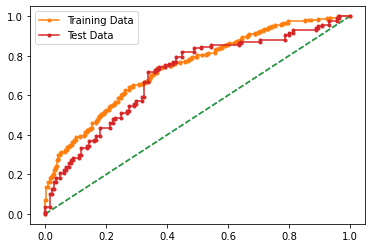

In [53]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [54]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6679389312977099

### Confusion Matrix for the training and testing data

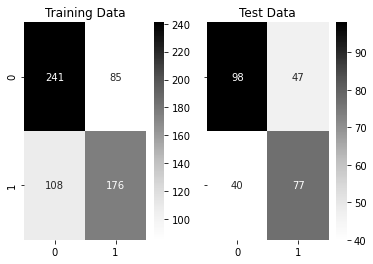

In [55]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [56]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.74      0.71       326
           1       0.67      0.62      0.65       284

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.71      0.68      0.69       145
           1       0.62      0.66      0.64       117

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262
 



## LDA Model

In [57]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [58]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6754098360655738

In [59]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6412213740458015

### Prediction

In [60]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)


### Training Data and Test Data Confusion Matrix Comparison

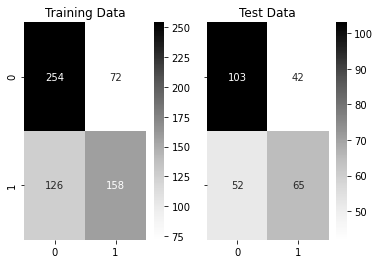

In [61]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [62]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



### Probability prediction for the training and test data

In [63]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.739
AUC for the Test Data: 0.703


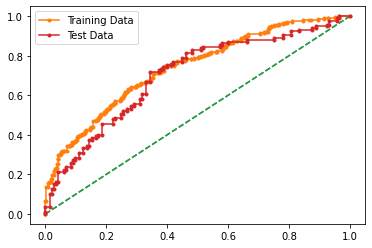

In [64]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()